<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/SIH/blob/master/SIH_objectDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing libraries

In [ ]:
from google.colab import drive
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /drive


In [1]:
import torch
import matplotlib.pyplot as plt
import glob
from PIL import Image

In [2]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/Garbage annotated dataset-20200728T111037Z-001.zip','r') as zip_ref:
  zip_ref.extractall('/content')

In [2]:
cd /content

/content


## data preprocessing is completed now we will start some code

In [3]:
face_images=[]
from tqdm import tqdm_notebook
for i in tqdm_notebook(range(1,536)):
      face_images+=["/content/Garbage annotated dataset/dataset/Images/image_{}.jpg".format(str(i))]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
f=open("/content/Garbage annotated dataset/dataset/Labels/image_1.txt",'r')
a=f.readline()
print(a.split(" ",10))

['1', '0.46166666666666667', '0.4925', '0.18333333333333335', '0.14\n']


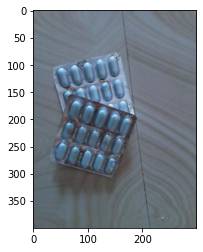

(300, 400)


In [15]:
img1=Image.open(face_images[510])
plt.imshow(img1)
plt.show()
print(img1.size)

In [4]:
labels=[]
for i in tqdm_notebook(range(1,536)):
  f=open("/content/Garbage annotated dataset/dataset/Labels/image_{}.txt".format(str(i)),'r')
  contents=f.readline()
  #print(contents)
  #print(contents)
  array1=contents.split(" ",10)
  array1[-1]=array1[-1][:-1]
  #print(i,array1)
  labels.append((list(map(lambda a: (float)(a), array1))))
  #print(labels)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [35]:
print(labels[5])

[1.0, 0.5583333333333333, 0.6377777777777778, 0.33666666666666667, 0.49333333333333335]


In [34]:
print(len(face_images))
print(len(labels))

535
535


In [ ]:
print(labels[0])

[0.46166666666666667, 0.4925, 0.18333333333333335, 0.14]


In [ ]:
print(labels[0])

[95, 71, 226, 313]


In [5]:
dataset=list(zip(face_images,labels))

In [37]:
print(dataset[0])

('/content/Garbage annotated dataset/dataset/Images/image_1.jpg', [1.0, 0.46166666666666667, 0.4925, 0.18333333333333335, 0.14])


In [6]:
import random

In [7]:
random.shuffle(dataset)
print(len(dataset))

535


In [40]:
print(dataset[0])

('/content/Garbage annotated dataset/dataset/Images/image_201.jpg', [1.0, 0.5650000000000001, 0.53125, 0.5700000000000001, 0.5803571428571428])


In [8]:
train_dataset=[x for i,x in enumerate(dataset) if(i<(0.98*len(dataset)))]
test_dataset=[dataset[x] for x in range((int)(0.98*len(dataset)),len(dataset)) ]

In [9]:
print(len(train_dataset))

525


In [10]:
dataset.clear()

In [11]:
print(len(test_dataset))

11


In [12]:
print(test_dataset[0])

('/content/Garbage annotated dataset/dataset/Images/image_46.jpg', [1.0, 0.4816666666666667, 0.5425, 0.20333333333333334, 0.245])


In [46]:
print(train_dataset[0])

('/content/Garbage annotated dataset/dataset/Images/image_201.jpg', [1.0, 0.5650000000000001, 0.53125, 0.5700000000000001, 0.5803571428571428])


In [47]:
from tqdm import tqdm_notebook
from PIL import Image
import numpy as np
import cupy as cp 
'''numpy executes on cpu even though you are on gpu.So i am using cupy which will execute on gpu and 10 times faster than numpy only on larger operations'''
import glob
n = 0
s = cp.zeros(3)
sq = cp.zeros(3)
for i in tqdm_notebook(range(1,536)):
  data=Image.open("/content/Garbage annotated dataset/dataset/Images/image_{}.jpg".format(str(i)))
  x = cp.array(data)/255
  s += x.sum(axis=(0,1))
  sq += cp.sum(cp.square(x), axis=(0,1))
  n += x.shape[0]*x.shape[1]

mu = s/n
std = cp.sqrt((sq/n - cp.square(mu)))
print(mu, sq/n, std, n)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.



[0.51656841 0.49307315 0.47740473] [0.31757835 0.29240591 0.2814696 ] [0.22524524 0.22200177 0.23141806] 56508600


In [13]:
from torchvision import transforms

mu=[0.51656841,0.49307315,0.47740473]
std=[0.22524524,0.22200177,0.23141806]

train_transforms=transforms.Compose([
                                     
 
  transforms.ToTensor(),
   transforms.Normalize(mu, std)

])

test_transforms=transforms.Compose(
    [
      
     transforms.ToTensor(),
transforms.Normalize(mu,std)

    ]
)


In [49]:
images,labels=zip(*train_dataset)
print(labels[0])

[1.0, 0.5650000000000001, 0.53125, 0.5700000000000001, 0.5803571428571428]


In [79]:
from torch.utils.data import Dataset
from skimage import io
import numpy as np
from PIL import Image
class get_dataset(Dataset):
  def __init__(self,dataset,transforms=None):
    self.image,self.labels=zip(*dataset)
    self.transform=transforms
 
  def __len__(self):
    return (len(self.image))
    
  def __getitem__(self,index):
      if(torch.is_tensor(index)):
        index=index.tolist(index)
      #print(self.image[index])  
      #print(index)

      input1=Image.open(self.image[index])
      input1=input1.resize((100,100))
      #print(input1.size)
      if(self.transform):
        input1=self.transform(input1)
      id,x,y,w,h=self.labels[index]
      #print("inside get_dataset",self.labels[index])  
      return self.image[index],input1,id,x,y,w,h

In [80]:
class DataLoader:
  """
  Helper class to load test and train data
  """
  def __init__(self, shuffle=True, batch_size=128, seed=1):
    cuda = torch.cuda.is_available()
    
    if cuda:
      torch.cuda.manual_seed(seed)

    # dataloader arguments - something you'll fetch these from cmdprmt
    self.dataloader_args = dict(shuffle=shuffle, batch_size=batch_size, num_workers=4, pin_memory=True) if cuda else dict(shuffle=shuffle, batch_size=batch_size)

  def load(self, data):
    return torch.utils.data.DataLoader(data, **self.dataloader_args)

In [81]:
train=get_dataset(train_dataset,train_transforms)
test=get_dataset(test_dataset,test_transforms)
dataloader=DataLoader(batch_size=32)
train_loader=dataloader.load(train)
test_loader=dataloader.load(test)

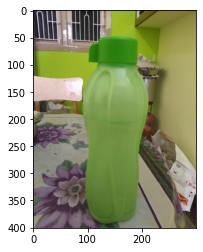

(300, 401)


In [23]:
img1=Image.open('/content/Garbage annotated dataset/dataset/Images/image_496.jpg')
plt.imshow(img1)
plt.show()
print(img1.size)

In [82]:
dataiter=iter(train_loader)
name,input1,x,y,w,h=dataiter.next()

ValueError: ignored

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


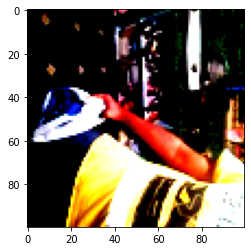

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 100, 100])
it is not a garbage
tensor(0.2100, dtype=torch.float64) tensor(0.4531, dtype=torch.float64) tensor(0.3333, dtype=torch.float64) tensor(0.2723, dtype=torch.float64)


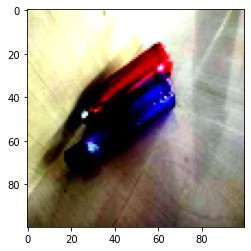

it is a garbage
tensor(0.4133, dtype=torch.float64) tensor(0.4511, dtype=torch.float64) tensor(0.5533, dtype=torch.float64) tensor(0.6533, dtype=torch.float64)


In [77]:
dataiter=iter(train_loader)
_,input1,id,x,y,w,h=dataiter.next()
#print(name[0])
plt.imshow(input1[0].numpy().transpose(1,2,0))
plt.show()
print(input1[0].shape)
if(id[0]==1):
  print("it is a garbage")
else:
  print("it is not a garbage")
print(x[0],y[0],w[0],h[0])
#print(name[1])
plt.imshow(input1[1].numpy().transpose(1,2,0))
plt.show()
if(id[1]==1):
  print("it is a garbage")
else:
  print("it is not a garbage")

print(x[1],y[1],w[1],h[1])

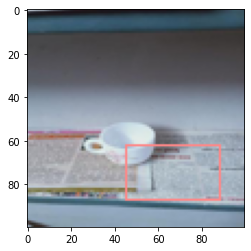

In [45]:
from PIL import Image, ImageDraw, ImageFont
import cv2
# get an image
im = Image.open('/content/Garbage annotated dataset/dataset/Images/image_333.jpg').resize((100,100))
draw = ImageDraw.Draw(im)
x0=0.4517*100
y0=0.6262*100
x1=0.43*100+x0
y1=0.2525*100+y0
draw.rectangle(((x0,y0),(x1,y1)), outline="#ff8888")
plt.imshow(im)
plt.show()

In [70]:
from torchsummary import summary
import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self,in_planes, planes, stride=1 ):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out
    

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 32
        self.trainer = None
        self.name = "Models"

        self.conv1 = nn.Conv2d(3,32, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(32)
        self.layer1 = self._make_layer(block, 32, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 32, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 32, num_blocks[3], stride=2)
        self.gap=nn.AdaptiveAvgPool2d((1,1))
        self.linear = nn.Linear(32*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.gap(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out
        
    def summary(self, input_size):
      summary(self, input_size=input_size)

  


def ResNet18(num_class=10):
    return ResNet(BasicBlock, [2,2,2,2],num_classes=num_class)


In [71]:
Model=ResNet18(5)
Model.cuda().float()
Model.summary((3, 100,100))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 100, 100]             864
       BatchNorm2d-2         [-1, 32, 100, 100]              64
            Conv2d-3         [-1, 32, 100, 100]           9,216
       BatchNorm2d-4         [-1, 32, 100, 100]              64
            Conv2d-5         [-1, 32, 100, 100]           9,216
       BatchNorm2d-6         [-1, 32, 100, 100]              64
        BasicBlock-7         [-1, 32, 100, 100]               0
            Conv2d-8         [-1, 32, 100, 100]           9,216
       BatchNorm2d-9         [-1, 32, 100, 100]              64
           Conv2d-10         [-1, 32, 100, 100]           9,216
      BatchNorm2d-11         [-1, 32, 100, 100]              64
       BasicBlock-12         [-1, 32, 100, 100]               0
           Conv2d-13           [-1, 32, 50, 50]           9,216
      BatchNorm2d-14           [-1, 32,

In [ ]:
# https://github.com/tqdm/tqdm
class Train:
  def __init__(self, model, dataloader, optimizer, stats, scheduler=None, L1lambda = 0,criterion=None):
    self.model = model
    self.dataloader = dataloader
    self.optimizer = optimizer
    self.scheduler = scheduler
    self.stats = stats
    self.L1lambda = L1lambda
    self.criterion=criterion
    self.loss=0.0
    self.loss1=0.0
    self.loss2=0.0
    self.use_amp=False
  def run(self):
    self.model.train()
    torch.backends.cudnn.benchmark = True
    torch.cuda.empty_cache()
    pbar = tqdm_notebook(self.dataloader)
    for data1,data2,target1,target2 in pbar:
      # get 
      data1,data2,target1,target2 = data1.to(self.model.device),data2.to(self.model.device),target1.to(self.model.device), target2.to(self.model.device)
 
      # Init
      self.optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.
 
      # Predict
      output1,output2 = self.model(data1,data2)
      output1,output2=output1.squeeze(1),output2.squeeze(1)
      #print("depth max is {}".format(output2.max()))
      #print("mask max is {}".format(output1.max()))
      #print(target2.max())

      self.loss1=self.criterion[0](output1,target1)
      self.loss2=self.criterion[1](output2,target2)
      self.loss=(self.loss1+self.loss2)
      #print(self.loss1)
      #print(self.loss2)
      #Implementing L1 regularization      
      if self.use_amp:
        with amp.scale_loss(self.loss, self.optimizer) as scaled_loss:
            scaled_loss.backward()
      else:
        self.loss.backward()
      self.optimizer.step()
 
      # Update pbar-tqdm
      correct1 = output1.long().eq(target1.long().view_as(output1.long())).float().mean().item()
      correct2 = output2.long().eq(target2.long().view_as(output2.long())).float().mean().item()
      correct=(correct1+correct2)/2.0
      #print(correct)
      lr = 0
      if self.scheduler:
        lr = self.scheduler.get_last_lr()[0]
      else:
        # not recalling why i used sekf.optimizer.lr_scheduler.get_last_lr[0]
        lr = self.optimizer.param_groups[0]['lr']
      
      #lr =  if self.scheduler else (self.optimizer.lr_scheduler.get_last_lr()[0] if self.optimizer.lr_scheduler else self.optimizer.param_groups[0]['lr'])
      
      self.stats.add_batch_train_stats(self.loss.item(), correct, len(data1), lr)
      pbar.set_description(self.stats.get_latest_batch_desc())
      if self.scheduler:
        self.scheduler.step()
 
class Test:
  def __init__(self, model, dataloader, stats,writer, scheduler=None,criterion=None):
    self.model = model
    self.dataloader = dataloader
    self.stats = stats
    self.scheduler = scheduler
    self.loss=0.0
    self.loss1=0.0
    self.loss2=0.0
    self.average_loss=0.0
    self.criterion=criterion
    self.writer=writer
  def run(self):
    self.model.eval()
    with torch.no_grad():
        for data1,data2,target1,target2 in self.dataloader:
            data1,data2,target1,target2 = data1.to(self.model.device),data2.to(self.model.device),target1.to(self.model.device), target2.to(self.model.device)
            output1,output2 = self.model(data1,data2)
            output1,output2=output1.squeeze(1),output2.squeeze(1)
            self.loss1=self.criterion[0](output1,target1)
            self.loss2=self.criterion[1](output2,target2)
            self.loss=(self.loss1+self.loss2)  # sum up batch loss
            self.average_loss+=self.loss
            correct1 = output1.long().eq(target1.long().view_as(output1.long())).float().mean().item()
            correct2 = output2.long().eq(target2.long().view_as(output2.long())).float().mean().item()
            correct=(correct1+correct2)/2.0
            #print(correct)
            self.stats.add_batch_test_stats(self.loss, correct, len(data1))
        self.average_loss/=len(self.dataloader)
        if self.scheduler and isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
              #we are trying to step the scheduler using average loss
              self.scheduler.step(self.average_loss)
 
 
def printing_results(model,dataloader,epoch):
   epoch+=8
   with torch.no_grad():
            data1,data2,target1,target2=iter(dataloader).next()
            data1,data2,target1,target2 = data1.to(model.device),data2.to(model.device),target1.to(model.device), target2.to(model.device)
            output1,output2 = model(data1,data2)
            output1,output2=output1.squeeze(1),output2.squeeze(1) 
            figure=plt.figure(figsize=(10,10))
            row=4
            col=4
            k=0
            print("masks")
            for i in range(1,row*col+1,2):
              figure.add_subplot(row,col,i)
              plt.imshow(target1[i-1].cpu().numpy()*255,cmap="gray")
              figure.add_subplot(row,col,i+1)
              plt.imshow((output1[i-1]).cpu().numpy()*255,cmap="gray")
              k+=1
            plt.savefig('/content/drive/My Drive/results_images/mask{}.jpg'.format(epoch))
            plt.show()
            figure=plt.figure(figsize=(10,10))
            row=4
            col=4
            k=0
            print("scaling masks between 0 and 1")
            for i in range(1,row*col+1,2):
              figure.add_subplot(row,col,i)
              plt.imshow(target1[i-1].cpu().numpy()*255,cmap="gray")
              figure.add_subplot(row,col,i+1)
              plt.imshow(return_image(output1[i-1])*255,cmap="gray")
              k+=1
            plt.savefig('/content/drive/My Drive/results_images/mask_scale{}.jpg'.format(epoch))
            plt.show()          
            print("printing depth images")       
            figure=plt.figure(figsize=(10,10))
            row=4
            col=4
            for i in range(1,row*col+1,2):
              figure.add_subplot(row,col,i)
              plt.imshow(target2[i-1].cpu().numpy()*255,cmap="gray")
              figure.add_subplot(row,col,i+1)
              plt.imshow(output2[i-1].cpu().numpy()*255,cmap="gray")
            plt.savefig('/content/drive/My Drive/results_images/depth{}.jpg'.format(epoch))
            plt.show()
class ModelTrainer:
  def __init__(self, model, optimizer, train_loader, test_loader, statspath,criterion,writer,scheduler=None, batch_scheduler=False, L1lambda = 0):
    self.model = model
    self.scheduler = scheduler
    self.criterion=criterion
    self.batch_scheduler = batch_scheduler
    self.optimizer = optimizer
    self.stats = ModelStats(model, statspath)
    self.train = Train(model, train_loader, optimizer, self.stats, self.scheduler if self.batch_scheduler else None, L1lambda,criterion)
    self.test = Test(model, test_loader, self.stats,writer,self.scheduler,criterion)
    self.misclass = Misclass(model, test_loader, self.stats)
    self.test_loader=test_loader
    torch.backends.cudnn.benchmark = True
    
  def run(self, epochs=10):
    pbar = tqdm_notebook(range(1, epochs+1), desc="Epochs")
    for epoch in pbar:
      self.train.run()
      self.test.run()
      lr = self.optimizer.param_groups[0]['lr']
      self.stats.next_epoch(lr)
      pbar.write(self.stats.get_epoch_desc())
      # need to ake it more readable and allow for other schedulers
      if self.scheduler and not self.batch_scheduler and not isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
        self.scheduler.step()
      pbar.write(f"Learning Rate = {lr:0.6f}")
      print("printing results")
      printing_results(self.model,self.test_loader,epoch)
 
    # save stats for later lookup
    self.stats.save()

In [88]:
optimizer = torch.optim.Adam(Model.parameters(), lr=0.1)
criterion=nn.MSELoss()
criterion1=torch.nn.BCEWithLogitsLoss()

In [ ]:
!ps -aux|grep python

root          19  0.3  0.9 431984 124124 ?       Sl   08:35   0:21 /usr/bin/python2 /usr/local/bin/jupyter-notebook --ip="172.28.0.2" --port=9000 --FileContentsManager.root_dir="/" --LargeFileManager.delete_to_trash=False --MappingKernelManager.root_dir="/content"
root         124  2.9 28.8 26619392 3846364 ?    Ssl  08:35   3:15 /usr/bin/python3 -m ipykernel_launcher -f /root/.local/share/jupyter/runtime/kernel-e82271e9-38ea-4397-81fd-b8b0fc07e62b.json
root        4013  0.0  0.0  39196  6552 ?        S    10:27   0:00 /bin/bash -c ps -aux|grep python
root        4015  0.0  0.0   5708   492 ?        D    10:27   0:00 grep python


In [ ]:
! kill -9 124 4013 4015

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



test_loss tensor(44800.0548, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(-6431.5178, device='cuda:0', dtype=torch.float64) tensor(16082.9651, device='cuda:0', dtype=torch.float64) tensor(-181.4915, device='cuda:0', dtype=torch.float64) tensor(20582.9910, device='cuda:0', dtype=torch.float64)


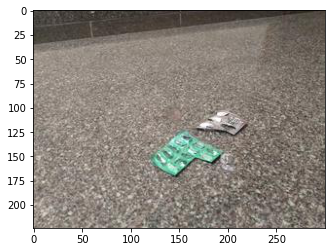


test_loss tensor(1.0839, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(45.3257, device='cuda:0', dtype=torch.float64) tensor(67.3750, device='cuda:0', dtype=torch.float64) tensor(60.2067, device='cuda:0', dtype=torch.float64) tensor(102.3138, device='cuda:0', dtype=torch.float64)


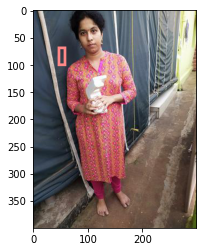


test_loss tensor(0.6785, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(46.9897, device='cuda:0', dtype=torch.float64) tensor(52.5319, device='cuda:0', dtype=torch.float64) tensor(80.2930, device='cuda:0', dtype=torch.float64) tensor(85.0658, device='cuda:0', dtype=torch.float64)


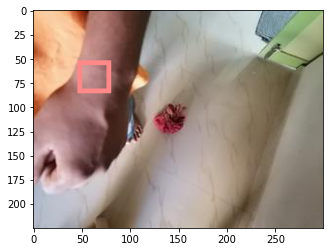


test_loss tensor(0.9659, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(63.5731, device='cuda:0', dtype=torch.float64) tensor(65.8683, device='cuda:0', dtype=torch.float64) tensor(116.3055, device='cuda:0', dtype=torch.float64) tensor(113.5663, device='cuda:0', dtype=torch.float64)


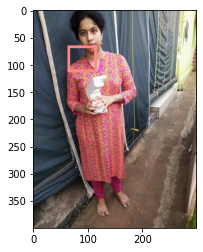


test_loss tensor(0.7706, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(51.1821, device='cuda:0', dtype=torch.float64) tensor(52.6186, device='cuda:0', dtype=torch.float64) tensor(88.2192, device='cuda:0', dtype=torch.float64) tensor(82.9330, device='cuda:0', dtype=torch.float64)


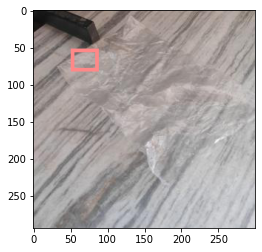


test_loss tensor(0.7243, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(50.9693, device='cuda:0', dtype=torch.float64) tensor(56.0047, device='cuda:0', dtype=torch.float64) tensor(86.2962, device='cuda:0', dtype=torch.float64) tensor(85.9596, device='cuda:0', dtype=torch.float64)


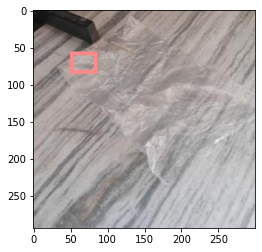


test_loss tensor(0.6562, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(48.9894, device='cuda:0', dtype=torch.float64) tensor(52.6135, device='cuda:0', dtype=torch.float64) tensor(83.9674, device='cuda:0', dtype=torch.float64) tensor(83.6410, device='cuda:0', dtype=torch.float64)


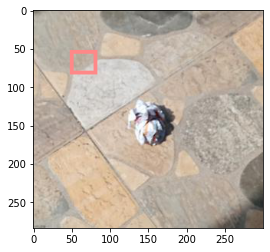


test_loss tensor(0.6421, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(43.4213, device='cuda:0', dtype=torch.float64) tensor(53.6511, device='cuda:0', dtype=torch.float64) tensor(75.2987, device='cuda:0', dtype=torch.float64) tensor(85.0844, device='cuda:0', dtype=torch.float64)


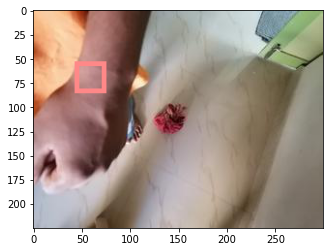


test_loss tensor(0.7693, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(36.8258, device='cuda:0', dtype=torch.float64) tensor(57.8040, device='cuda:0', dtype=torch.float64) tensor(84.6073, device='cuda:0', dtype=torch.float64) tensor(96.2441, device='cuda:0', dtype=torch.float64)


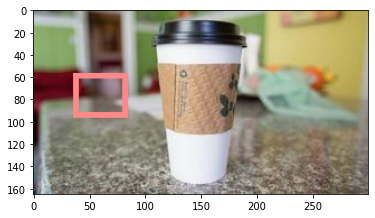


test_loss tensor(0.7487, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(50.5686, device='cuda:0', dtype=torch.float64) tensor(53.3383, device='cuda:0', dtype=torch.float64) tensor(82.0341, device='cuda:0', dtype=torch.float64) tensor(87.6613, device='cuda:0', dtype=torch.float64)


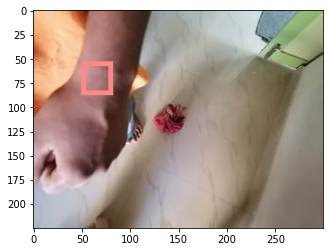


test_loss tensor(0.5976, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(49.6493, device='cuda:0', dtype=torch.float64) tensor(50.9791, device='cuda:0', dtype=torch.float64) tensor(83.9002, device='cuda:0', dtype=torch.float64) tensor(82.0620, device='cuda:0', dtype=torch.float64)


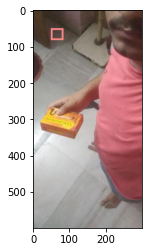


test_loss tensor(0.8567, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(50.3573, device='cuda:0', dtype=torch.float64) tensor(54.8884, device='cuda:0', dtype=torch.float64) tensor(86.1226, device='cuda:0', dtype=torch.float64) tensor(84.9103, device='cuda:0', dtype=torch.float64)


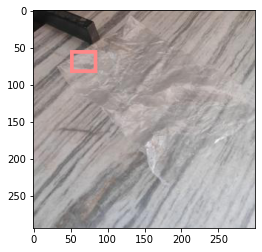


test_loss tensor(0.5845, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(49.4006, device='cuda:0', dtype=torch.float64) tensor(52.9092, device='cuda:0', dtype=torch.float64) tensor(90.1982, device='cuda:0', dtype=torch.float64) tensor(87.9338, device='cuda:0', dtype=torch.float64)


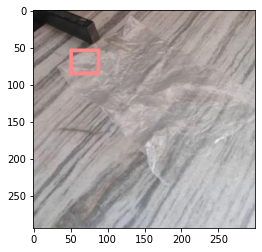


test_loss tensor(0.7397, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(43.1767, device='cuda:0', dtype=torch.float64) tensor(53.4689, device='cuda:0', dtype=torch.float64) tensor(83.5380, device='cuda:0', dtype=torch.float64) tensor(84.2406, device='cuda:0', dtype=torch.float64)


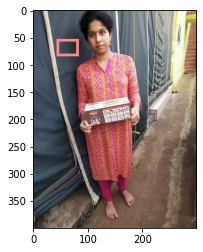


test_loss tensor(0.5601, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(53.7893, device='cuda:0', dtype=torch.float64) tensor(49.2162, device='cuda:0', dtype=torch.float64) tensor(89.1690, device='cuda:0', dtype=torch.float64) tensor(83.1738, device='cuda:0', dtype=torch.float64)


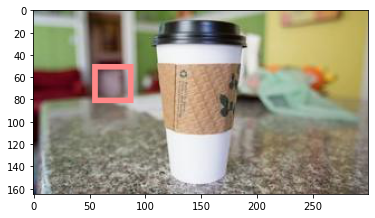


test_loss tensor(0.6020, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(49.8918, device='cuda:0', dtype=torch.float64) tensor(51.1086, device='cuda:0', dtype=torch.float64) tensor(97.5253, device='cuda:0', dtype=torch.float64) tensor(83.6450, device='cuda:0', dtype=torch.float64)


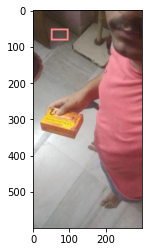


test_loss tensor(0.8413, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(45.7656, device='cuda:0', dtype=torch.float64) tensor(49.5246, device='cuda:0', dtype=torch.float64) tensor(96.0323, device='cuda:0', dtype=torch.float64) tensor(77.9028, device='cuda:0', dtype=torch.float64)


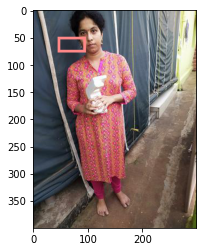


test_loss tensor(0.6689, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(51.5100, device='cuda:0', dtype=torch.float64) tensor(53.5827, device='cuda:0', dtype=torch.float64) tensor(93.5568, device='cuda:0', dtype=torch.float64) tensor(81.2128, device='cuda:0', dtype=torch.float64)


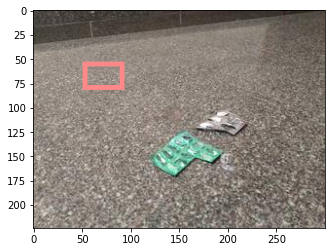


test_loss tensor(0.5835, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(52.1797, device='cuda:0', dtype=torch.float64) tensor(54.6615, device='cuda:0', dtype=torch.float64) tensor(92.3749, device='cuda:0', dtype=torch.float64) tensor(87.9550, device='cuda:0', dtype=torch.float64)


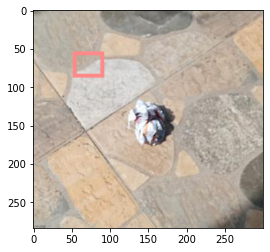


test_loss tensor(0.6724, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(44.1393, device='cuda:0', dtype=torch.float64) tensor(57.9208, device='cuda:0', dtype=torch.float64) tensor(85.4439, device='cuda:0', dtype=torch.float64) tensor(95.5772, device='cuda:0', dtype=torch.float64)


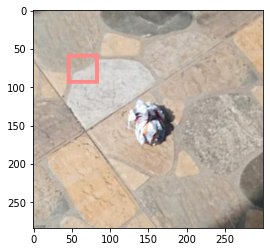


test_loss tensor(0.4502, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(44.2162, device='cuda:0', dtype=torch.float64) tensor(56.4476, device='cuda:0', dtype=torch.float64) tensor(80.2257, device='cuda:0', dtype=torch.float64) tensor(86.9509, device='cuda:0', dtype=torch.float64)


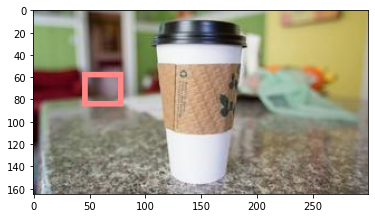


test_loss tensor(0.6649, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(47.4390, device='cuda:0', dtype=torch.float64) tensor(51.4598, device='cuda:0', dtype=torch.float64) tensor(80.4340, device='cuda:0', dtype=torch.float64) tensor(82.1328, device='cuda:0', dtype=torch.float64)


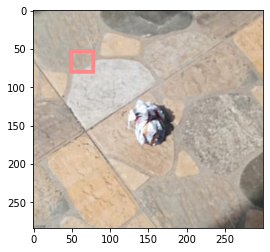


test_loss tensor(0.4816, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(49.7814, device='cuda:0', dtype=torch.float64) tensor(62.4832, device='cuda:0', dtype=torch.float64) tensor(84.9202, device='cuda:0', dtype=torch.float64) tensor(93.5882, device='cuda:0', dtype=torch.float64)


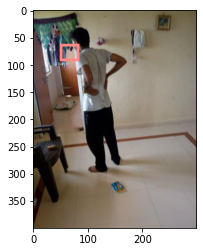


test_loss tensor(0.6449, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(43.4024, device='cuda:0', dtype=torch.float64) tensor(63.9827, device='cuda:0', dtype=torch.float64) tensor(73.3110, device='cuda:0', dtype=torch.float64) tensor(90.0141, device='cuda:0', dtype=torch.float64)


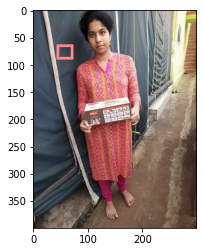


test_loss tensor(0.4664, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(46.9558, device='cuda:0', dtype=torch.float64) tensor(60.6645, device='cuda:0', dtype=torch.float64) tensor(91.6647, device='cuda:0', dtype=torch.float64) tensor(91.9756, device='cuda:0', dtype=torch.float64)


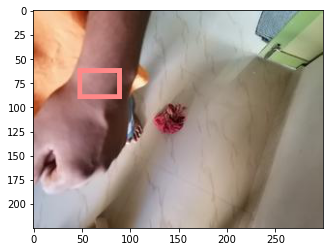


test_loss tensor(0.4444, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(46.4714, device='cuda:0', dtype=torch.float64) tensor(58.1166, device='cuda:0', dtype=torch.float64) tensor(79.2575, device='cuda:0', dtype=torch.float64) tensor(88.2395, device='cuda:0', dtype=torch.float64)


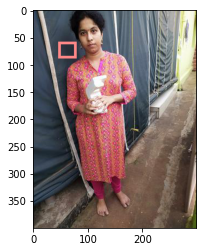


test_loss tensor(0.5199, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(41.8173, device='cuda:0', dtype=torch.float64) tensor(56.8669, device='cuda:0', dtype=torch.float64) tensor(90.5281, device='cuda:0', dtype=torch.float64) tensor(94.1361, device='cuda:0', dtype=torch.float64)


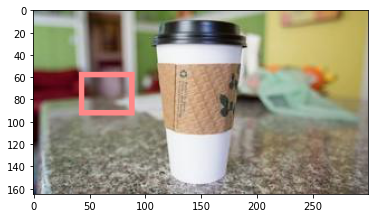


test_loss tensor(0.4667, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(54.1369, device='cuda:0', dtype=torch.float64) tensor(58.3729, device='cuda:0', dtype=torch.float64) tensor(86.1442, device='cuda:0', dtype=torch.float64) tensor(87.3554, device='cuda:0', dtype=torch.float64)


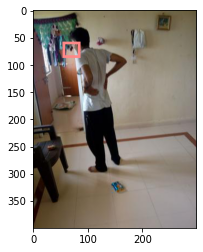


test_loss tensor(0.4709, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(47.2160, device='cuda:0', dtype=torch.float64) tensor(57.5386, device='cuda:0', dtype=torch.float64) tensor(80.7387, device='cuda:0', dtype=torch.float64) tensor(87.4768, device='cuda:0', dtype=torch.float64)


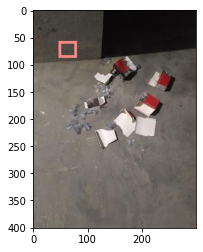


test_loss tensor(0.4809, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(48.7018, device='cuda:0', dtype=torch.float64) tensor(50.0977, device='cuda:0', dtype=torch.float64) tensor(91.4973, device='cuda:0', dtype=torch.float64) tensor(85.7596, device='cuda:0', dtype=torch.float64)


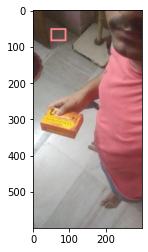


test_loss tensor(0.5295, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(48.4415, device='cuda:0', dtype=torch.float64) tensor(51.0323, device='cuda:0', dtype=torch.float64) tensor(88.2975, device='cuda:0', dtype=torch.float64) tensor(79.4701, device='cuda:0', dtype=torch.float64)


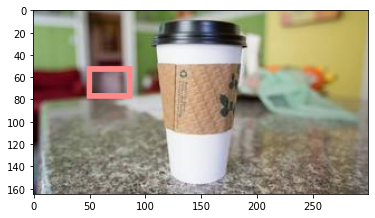


test_loss tensor(0.5348, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(53.6373, device='cuda:0', dtype=torch.float64) tensor(54.1576, device='cuda:0', dtype=torch.float64) tensor(88.0080, device='cuda:0', dtype=torch.float64) tensor(86.9605, device='cuda:0', dtype=torch.float64)


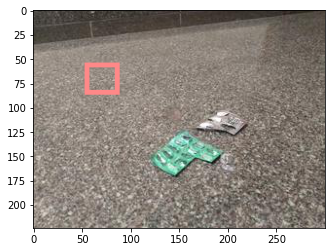


test_loss tensor(0.5380, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(48.7701, device='cuda:0', dtype=torch.float64) tensor(56.4629, device='cuda:0', dtype=torch.float64) tensor(77.7983, device='cuda:0', dtype=torch.float64) tensor(86.2056, device='cuda:0', dtype=torch.float64)


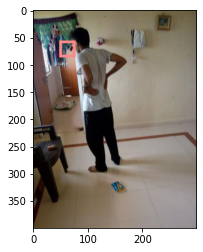


test_loss tensor(0.5255, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(46.4638, device='cuda:0', dtype=torch.float64) tensor(58.2955, device='cuda:0', dtype=torch.float64) tensor(88.2104, device='cuda:0', dtype=torch.float64) tensor(101.2697, device='cuda:0', dtype=torch.float64)


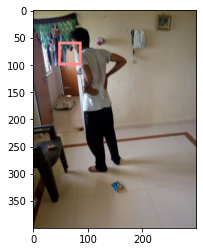


test_loss tensor(0.4622, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(50.0724, device='cuda:0', dtype=torch.float64) tensor(55.2952, device='cuda:0', dtype=torch.float64) tensor(85.5425, device='cuda:0', dtype=torch.float64) tensor(82.9037, device='cuda:0', dtype=torch.float64)


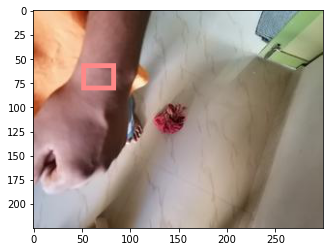


test_loss tensor(0.6332, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(47.5133, device='cuda:0', dtype=torch.float64) tensor(52.0877, device='cuda:0', dtype=torch.float64) tensor(106.5511, device='cuda:0', dtype=torch.float64) tensor(90.6214, device='cuda:0', dtype=torch.float64)


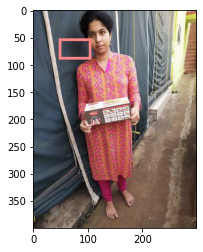


test_loss tensor(0.4445, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(46.0462, device='cuda:0', dtype=torch.float64) tensor(51.8860, device='cuda:0', dtype=torch.float64) tensor(82.3017, device='cuda:0', dtype=torch.float64) tensor(91.3861, device='cuda:0', dtype=torch.float64)


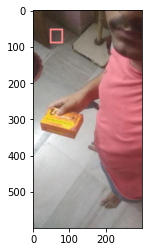


test_loss tensor(0.4699, device='cuda:0', dtype=torch.float64)
not a garbage
tensor(43.8531, device='cuda:0', dtype=torch.float64) tensor(58.2492, device='cuda:0', dtype=torch.float64) tensor(93.5598, device='cuda:0', dtype=torch.float64) tensor(91.4267, device='cuda:0', dtype=torch.float64)


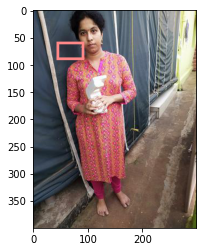


test_loss tensor(0.4133, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(48.8390, device='cuda:0', dtype=torch.float64) tensor(59.0353, device='cuda:0', dtype=torch.float64) tensor(82.5886, device='cuda:0', dtype=torch.float64) tensor(89.4839, device='cuda:0', dtype=torch.float64)


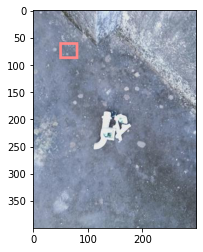


test_loss tensor(0.4711, device='cuda:0', dtype=torch.float64)
it is  a garbage
tensor(49.4958, device='cuda:0', dtype=torch.float64) tensor(48.4249, device='cuda:0', dtype=torch.float64) tensor(84.6210, device='cuda:0', dtype=torch.float64) tensor(78.2965, device='cuda:0', dtype=torch.float64)


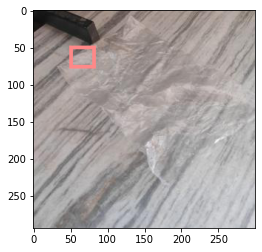

In [89]:
EPOCHS=40
for epoch in range(EPOCHS):
    Model.train()
    torch.backends.cudnn.benchmark = True
    torch.cuda.empty_cache()
    pbar = tqdm_notebook(train_loader)
    for i,[_,image,id,x,y,w,h] in enumerate(pbar):
      # get 
      image,id,x,y,w,h = image.to('cuda'),id.to('cuda'),x.to('cuda'),y.to('cuda'),w.to('cuda'),h.to('cuda') 

      # Init
      optimizer.zero_grad()
      # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes. 
      # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.
 
      # Predict
      predictions=Model(image).double()
      loss1=criterion1(predictions[:,0],id)
      loss2=criterion(predictions[:,1],x)+criterion(predictions[:,2],y)+criterion(predictions[:,3],w)+criterion(predictions[:,4],h) 
      loss=loss1+loss2
      loss.backward()
      optimizer.step()
      pbar.set_description(f'Batch={i} Loss={loss:0.4f}')
      
    # testing starts now
    Model.eval()
    with torch.no_grad():
        for i,[_,image,id,x,y,w,h] in enumerate(test_loader):
          image,id,x,y,w,h = image.to('cuda'),id.to('cuda'),x.to('cuda'),y.to('cuda'),w.to('cuda'),h.to('cuda') 
          predictions=Model(image).double()
          loss1=criterion1(predictions[:,0],id)
          loss2=criterion(predictions[:,1],x)+criterion(predictions[:,2],y)+criterion(predictions[:,3],w)+criterion(predictions[:,4],h) 
          loss=loss1+loss2
        print("test_loss",loss/(len(test_loader)))  

        # get an image
        name,im,id,x,y,w,h = next(iter(test_loader))
        image=Image.open(name[0])
        draw = ImageDraw.Draw(image)
        im= im.to('cuda') 
        predictions=Model(im).double()
        id,x,y,w,h=predictions[0]
        if(id<0.4):
          print("not a garbage")
        else:
          print("it is  a garbage")
        x0=x*100
        y0=y*100
        x1=w*100+x0
        y1=h*100+y0
        print(x0,y0,x1,y1)
        draw.rectangle(((x0,y0),(x1,y1)), outline="#ff8888",width=5)
        plt.imshow(image)
        plt.show()    




